# PROJECT LAYOUT

#### The aim of this project is to cleanse and combine 6 data files taken from US Govt Transport website and answer the following questions, along with relevant visualizations:

#### 1. What is the trend of on-time flight movements?
#### 2. How does load-factor vary with on-time flight performances?
#### 3. What is the share of Domestic and International flights in revenue and profits?
#### 4. What is the distribution of sector-wise flight operations in profit and revenue percentages?

# A. READING IN THE FLIGHT DATA

In [3]:
import pandas as pd

flights = pd.read_csv("Flights.csv")
flights.head()

,Flights (All Carriers - All Airports ),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
1,2002,10,"8,15,489","92,565","9,08,054"
2,2002,11,"7,66,775","91,342","8,58,117"
3,2002,12,"7,82,175","96,881","8,79,056"
4,2002,TOTAL,"80,85,083","10,23,994","91,09,077"


### Cleaning the Data -  Renaming Header Row and deleting rows with 2002 year's information

In [4]:
flights.columns = ["Year", "Month", "Domestic", "International", "Total"]
flights = flights[5:200]
flights = flights.reset_index()
flights = flights.drop(columns="index", axis=1)
flights.head(15)

,Year,Month,Domestic,International,Total
0,2003,1,"7,85,651","98,053","8,83,704"
1,2003,2,"6,90,750","85,965","7,76,715"
2,2003,3,"7,97,634","97,929","8,95,563"
3,2003,4,"7,66,639","89,398","8,56,037"
4,2003,5,"7,89,857","87,671","8,77,528"
5,2003,6,"7,98,841","95,435","8,94,276"
6,2003,7,"8,32,075","1,02,795","9,34,870"
7,2003,8,"8,31,185","1,02,145","9,33,330"
8,2003,9,"7,82,264","90,681","8,72,945"
9,2003,10,"8,18,777","91,820","9,10,597"


In [5]:
# Removing Rows with each years' annual statistics.
A = list([(x*13 - 1) for x in range(1,16)])

flights = flights.drop(A)
flights.head()

,Year,Month,Domestic,International,Total
0,2003,1,"7,85,651","98,053","8,83,704"
1,2003,2,"6,90,750","85,965","7,76,715"
2,2003,3,"7,97,634","97,929","8,95,563"
3,2003,4,"7,66,639","89,398","8,56,037"
4,2003,5,"7,89,857","87,671","8,77,528"


### Removing comma signs and giving clearer column names

In [6]:
cols = ["Domestic", "International", "Total"]

for col in cols:
    flights[col] = flights[col].str.replace(",", "")
    flights[col] = pd.to_numeric(flights[col], errors="coerce")

flights.columns = ["Year", "Month", "Flights_Domestic", "Flights_International", "Flights_Total"]
flights.head()

,Year,Month,Flights_Domestic,Flights_International,Flights_Total
0,2003,1,785651,98053,883704
1,2003,2,690750,85965,776715
2,2003,3,797634,97929,895563
3,2003,4,766639,89398,856037
4,2003,5,789857,87671,877528


# B. READING IN THE LOAD_FACTOR DATA

In [7]:
load_factor = pd.read_csv("LoadFactor.csv")
load_factor.head()

,Load Factor (passenger-miles as a proportion of available seat-miles in percent (%)) (All Carriers - All Airports ),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
1,2002,10,67.88,72.85,70.01
2,2002,11,66.62,69.86,68
3,2002,12,72.88,73.42,73.11
4,2002,TOTAL,70.37,75.6,72.61


In [8]:
# Giving proper names
load_factor.columns = ["Year", "Month", "Domestic", "International", "Total"]
load_factor.head(15)

,Year,Month,Domestic,International,Total
0,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
1,2002,10,67.88,72.85,70.01
2,2002,11,66.62,69.86,68
3,2002,12,72.88,73.42,73.11
4,2002,TOTAL,70.37,75.6,72.61
5,2003,1,64.4,72.5,67.9
6,2003,2,68.1,68.89,68.43
7,2003,3,72.43,69.36,71.14
8,2003,4,72.13,66.78,69.97
9,2003,5,73.98,72.42,73.35


### Removing year 2002's stats and annual stats of years

In [9]:
load_factor = load_factor[5:200]

load_factor = load_factor.reset_index()
load_factor = load_factor.drop(columns="index", axis=1)

A = list([(x*13 - 1) for x in range(1,16)])

load_factor = load_factor.drop(A)
load_factor.head()

,Year,Month,Domestic,International,Total
0,2003,1,64.4,72.5,67.9
1,2003,2,68.1,68.89,68.43
2,2003,3,72.43,69.36,71.14
3,2003,4,72.13,66.78,69.97
4,2003,5,73.98,72.42,73.35


In [10]:
# Removing comma signs and giving clearer column names

cols = ["Domestic", "International", "Total"]

for col in cols:
    load_factor[col] = load_factor[col].str.replace(",", "")
    load_factor[col] = pd.to_numeric(load_factor[col], errors="coerce")

### Merging flights and load_factor dataframes

In [11]:
load_factor.columns = ["Year", "Month", "load_factor_Domestic", "load_factor_International", "load_factor_Total"]

flights_load_factor = flights[flights.columns].merge(load_factor, "left")

flights_load_factor.head()

,Year,Month,Flights_Domestic,Flights_International,Flights_Total,load_factor_Domestic,load_factor_International,load_factor_Total
0,2003,1,785651,98053,883704,64.40,72.50,67.90
1,2003,2,690750,85965,776715,68.10,68.89,68.43
2,2003,3,797634,97929,895563,72.43,69.36,71.14
3,2003,4,766639,89398,856037,72.13,66.78,69.97
4,2003,5,789857,87671,877528,73.98,72.42,73.35


# C. READING IN THE ON-TIME PERFORMANCE DATA

In [12]:
on_time_perf = pd.read_csv("On-Time-Data.csv")
on_time_perf.head()

,Table 1 Summary of Airline On-Time Performance Year-to-date through January 2017,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Year-to-date numbers for all years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Year,Operations,Late Arrivals,Late Departures,Cancelled,Diverted,Percent On-Time Arrivals,Percent Late Arrivals,Percent Late Departures,Percent Cancelled,Percent Diverted,NaN,NaN
2,1995,"4,64,933","1,06,076","86,193","14,261","1,348",73.83,22.82,18.54,3.07,0.29,NaN,NaN
3,1996,"4,47,224","1,35,407","1,11,316","29,595","1,948",62.67,30.28,24.89,6.62,0.44,NaN,NaN
4,1997,"4,59,123","1,25,428","1,00,351","18,142","1,484",68.41,27.32,21.86,3.95,0.32,NaN,NaN


### Dropping empty rows and columns

In [13]:
# Dropping Empty Rows
on_time_perf = on_time_perf[1:24]

# Resetting index
on_time_perf = on_time_perf.reset_index()

# Dropping unneeded columns
on_time_perf = on_time_perf.drop(columns=["index", "Unnamed: 11", "Unnamed: 12"])

# Assigning the first row and header row
on_time_perf.columns = on_time_perf.iloc[0]

# Removing first row(now header) from the data
on_time_perf = on_time_perf[1:24]

# Resetting index
on_time_perf = on_time_perf.reset_index()
on_time_perf = on_time_perf.drop(columns=["index"])

on_time_perf.head()

,Year,Operations,Late Arrivals,Late Departures,Cancelled,Diverted,Percent On-Time Arrivals,Percent Late Arrivals,Percent Late Departures,Percent Cancelled,Percent Diverted
0,1995,"4,64,933","1,06,076","86,193","14,261","1,348",73.83,22.82,18.54,3.07,0.29
1,1996,"4,47,224","1,35,407","1,11,316","29,595","1,948",62.67,30.28,24.89,6.62,0.44
2,1997,"4,59,123","1,25,428","1,00,351","18,142","1,484",68.41,27.32,21.86,3.95,0.32
3,1998,"4,52,001","97,609","76,993","13,880","1,274",75.05,21.59,17.03,3.07,0.28
4,1999,"4,53,814","1,18,153","1,00,762","26,543","2,048",67.66,26.04,22.20,5.85,0.45


### Removing comma signs

In [14]:
for col in on_time_perf.columns.drop("Year"):
    on_time_perf[col] = on_time_perf[col].str.replace(",", "")
    on_time_perf[col] = pd.to_numeric(on_time_perf[col], errors="coerce")

on_time_perf.head()

,Year,Operations,Late Arrivals,Late Departures,Cancelled,Diverted,Percent On-Time Arrivals,Percent Late Arrivals,Percent Late Departures,Percent Cancelled,Percent Diverted
0,1995,464933,106076,86193,14261,1348,73.83,22.82,18.54,3.07,0.29
1,1996,447224,135407,111316,29595,1948,62.67,30.28,24.89,6.62,0.44
2,1997,459123,125428,100351,18142,1484,68.41,27.32,21.86,3.95,0.32
3,1998,452001,97609,76993,13880,1274,75.05,21.59,17.03,3.07,0.28
4,1999,453814,118153,100762,26543,2048,67.66,26.04,22.20,5.85,0.45


# D. READING IN THE OPERATING PROFIT/LOSS DATA

In [15]:
op_p_l = pd.read_csv("Operating_ProfitLoss.csv")
op_p_l.tail()

,Net Income (In Thousands of Dollars $000) (All U.S. Carriers - All regions),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
87,2017,2,"50,41,236","1,58,700","1,15,185","-2,59,166","-58,463","49,97,492"
88,2017,3,"35,99,494","3,88,455","19,548","-87,092","15,868","39,36,273"
89,2017,TOTAL,"1,12,93,806","6,10,144",-155,"-5,86,344","-57,279","1,12,60,171"
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Note: All numbers are for scheduled services.,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Assigning first row as column names, and excluding the after 89 indexed rows(since they're empty)

In [16]:
op_p_l.columns = op_p_l.iloc[0]
op_p_l = op_p_l[1:90]
op_p_l = op_p_l.reset_index()
op_p_l = op_p_l.drop(columns="index", axis=1)

In [17]:
# Removing rows containing annual statistics

A = list([(x*5 - 1) for x in range(1,18)])

op_p_l = op_p_l.drop(A)

op_p_l.head()

,Year,Quarter,DOMESTIC,LATIN AMERICA,ATLANTIC,PACIFIC,INTERNATIONAL,TOTAL
0,2000,1,"1,39,162","58,927","-68,918","-1,06,308",839,"23,702"
1,2000,2,"15,70,500","-86,040","2,50,371","1,54,724","9,541","18,99,096"
2,2000,3,"5,48,903","33,056","2,26,224","83,675","45,470","9,37,327"
3,2000,4,"-2,67,068","6,639","-95,916","5,533","23,388","-3,27,425"
5,2001,1,"-8,22,384","76,822","-59,644","-1,01,160","-3,410","-9,09,776"


### Clearing the comma signs and giving clearer column names

In [18]:
for col in op_p_l.columns.drop("Year"):
    op_p_l[col] = op_p_l[col].str.replace(",", "")
    op_p_l[col] = pd.to_numeric(op_p_l[col], errors="coerce")
    
op_p_l.columns = ["Year", "Quarter", "Domestic_PL", "Latin America_PL", "Atlantic_PL", "Pacific_PL", "International_PL", "Total_PL"]
        
op_p_l.head()

,Year,Quarter,Domestic_PL,Latin America_PL,Atlantic_PL,Pacific_PL,International_PL,Total_PL
0,2000,1.0,139162,58927,-68918,-106308,839,23702
1,2000,2.0,1570500,-86040,250371,154724,9541,1899096
2,2000,3.0,548903,33056,226224,83675,45470,937327
3,2000,4.0,-267068,6639,-95916,5533,23388,-327425
5,2001,1.0,-822384,76822,-59644,-101160,-3410,-909776


# E. READING IN THE OPERATING REVENUE DATA

In [19]:
op_rev = pd.read_csv("Operating_Revenue.csv")
op_rev.head()

,Operating Revenue (In Thousands of Dollars $000) (All U.S. Carriers - All regions),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Year,Quarter,DOMESTIC,LATIN AMERICA,ATLANTIC,PACIFIC,INTERNATIONAL,TOTAL
1,2000,1,"2,32,62,183","16,39,679","26,90,229","22,40,370","3,70,524","3,02,02,987"
2,2000,2,"2,55,73,067","16,26,743","34,19,032","24,32,840","3,90,007","3,34,41,689"
3,2000,3,"2,53,13,087","17,76,933","37,96,968","28,01,208","3,70,491","3,40,58,686"
4,2000,4,"2,47,51,473","17,61,932","31,13,734","25,45,414","3,72,305","3,25,44,858"


### Removing the unneeded rows, rows with annual stats, removing comma signs and giving clearer column names

### Then, Merging the column operating revenue with operating profit & loss into a new dataframe

In [20]:
op_rev.columns = op_rev.iloc[0]
op_rev = op_rev[1:90]
op_rev = op_rev.reset_index()
op_rev = op_rev.drop(columns="index", axis=1)

A = list([(x*5 - 1) for x in range(1,18)])

op_rev = op_rev.drop(A)

for col in op_rev.columns.drop("Year"):
    op_rev[col] = op_rev[col].str.replace(",", "")
    op_rev[col] = pd.to_numeric(op_rev[col], errors="coerce")
    
op_rev.columns = ["Year", "Quarter", "Domestic_RV", "Latin America_RV", "Atlantic_RV", "Pacific_RV", "International_RV", "Total_RV"]
    
financials = op_p_l[op_p_l.columns].merge(op_rev, "left")
    
financials.head()

,Year,Quarter,Domestic_PL,Latin America_PL,Atlantic_PL,Pacific_PL,International_PL,Total_PL,Domestic_RV,Latin America_RV,Atlantic_RV,Pacific_RV,International_RV,Total_RV
0,2000,1.0,139162,58927,-68918,-106308,839,23702,23262183,1639679,2690229,2240370,370524,30202987
1,2000,2.0,1570500,-86040,250371,154724,9541,1899096,25573067,1626743,3419032,2432840,390007,33441689
2,2000,3.0,548903,33056,226224,83675,45470,937327,25313087,1776933,3796968,2801208,370491,34058686
3,2000,4.0,-267068,6639,-95916,5533,23388,-327425,24751473,1761932,3113734,2545414,372305,32544858
4,2001,1.0,-822384,76822,-59644,-101160,-3410,-909776,23620312,1848448,2913460,2319491,409925,31111636


# F. READING IN THE PASSENGERS COUNT DATA

In [21]:
pass_count = pd.read_csv("Passengers.csv")
pass_count.head()

,Passengers (All Carriers - All Airports ),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
1,2002,10,"4,80,54,917","95,78,435","5,76,33,352"
2,2002,11,"4,48,50,246","90,16,535","5,38,66,781"
3,2002,12,"4,96,84,353","1,00,38,794","5,97,23,147"
4,2002,TOTAL,"55,18,99,643","11,87,04,850","67,06,04,493"


### Giving clearer names to columns, removing year 2002's rows, resetting index

In [22]:
pass_count.columns = ["Year", "Month", "Domestic", "International", "Total"]
pass_count = pass_count[5:200]
pass_count = pass_count.reset_index()
pass_count = pass_count.drop(columns="index", axis=1)
pass_count.head()

,Year,Month,Domestic,International,Total
0,2003,1,"4,30,32,450","97,26,436","5,27,58,886"
1,2003,2,"4,11,66,780","82,83,372","4,94,50,152"
2,2003,3,"4,99,92,700","95,38,653","5,95,31,353"
3,2003,4,"4,70,33,260","83,09,305","5,53,42,565"
4,2003,5,"4,91,52,352","88,01,873","5,79,54,225"


In [23]:
# Removing rows with annual stats
A = list([(x*13 - 1) for x in range(1,16)])

pass_count = pass_count.drop(A)
pass_count.head()

,Year,Month,Domestic,International,Total
0,2003,1,"4,30,32,450","97,26,436","5,27,58,886"
1,2003,2,"4,11,66,780","82,83,372","4,94,50,152"
2,2003,3,"4,99,92,700","95,38,653","5,95,31,353"
3,2003,4,"4,70,33,260","83,09,305","5,53,42,565"
4,2003,5,"4,91,52,352","88,01,873","5,79,54,225"


### Removing the comma signs and giving clearer column names

In [24]:
cols = ["Domestic", "International", "Total"]

for col in cols:
    pass_count[col] = pass_count[col].str.replace(",", "")
    pass_count[col] = pd.to_numeric(pass_count[col], errors="coerce")

pass_count.columns = ["Year", "Month", "Pass_Domestic", "Pass_International", "Pass_Total"]

pass_count.head()

,Year,Month,Pass_Domestic,Pass_International,Pass_Total
0,2003,1,43032450,9726436,52758886
1,2003,2,41166780,8283372,49450152
2,2003,3,49992700,9538653,59531353
3,2003,4,47033260,8309305,55342565
4,2003,5,49152352,8801873,57954225


In [25]:
# Merging the pass_count column with flights_load_factor(that we had merged earlier) to combine into a single dataframe.

flights_pass = flights_load_factor[flights_load_factor.columns].merge(pass_count, "left")
flights_pass.head()

,Year,Month,Flights_Domestic,Flights_International,Flights_Total,load_factor_Domestic,load_factor_International,load_factor_Total,Pass_Domestic,Pass_International,Pass_Total
0,2003,1,785651,98053,883704,64.40,72.50,67.90,43032450,9726436,52758886
1,2003,2,690750,85965,776715,68.10,68.89,68.43,41166780,8283372,49450152
2,2003,3,797634,97929,895563,72.43,69.36,71.14,49992700,9538653,59531353
3,2003,4,766639,89398,856037,72.13,66.78,69.97,47033260,8309305,55342565
4,2003,5,789857,87671,877528,73.98,72.42,73.35,49152352,8801873,57954225


In [27]:
financials.head()

,Year,Quarter,Domestic_PL,Latin America_PL,Atlantic_PL,Pacific_PL,International_PL,Total_PL,Domestic_RV,Latin America_RV,Atlantic_RV,Pacific_RV,International_RV,Total_RV
0,2000,1.0,139162,58927,-68918,-106308,839,23702,23262183,1639679,2690229,2240370,370524,30202987
1,2000,2.0,1570500,-86040,250371,154724,9541,1899096,25573067,1626743,3419032,2432840,390007,33441689
2,2000,3.0,548903,33056,226224,83675,45470,937327,25313087,1776933,3796968,2801208,370491,34058686
3,2000,4.0,-267068,6639,-95916,5533,23388,-327425,24751473,1761932,3113734,2545414,372305,32544858
4,2001,1.0,-822384,76822,-59644,-101160,-3410,-909776,23620312,1848448,2913460,2319491,409925,31111636


In [29]:
on_time_perf.tail()

,Year,Operations,Late Arrivals,Late Departures,Cancelled,Diverted,Percent On-Time Arrivals,Percent Late Arrivals,Percent Late Departures,Percent Cancelled,Percent Diverted
17,2012,486133,70908,67081,7104,1004,83.75,14.59,13.80,1.46,0.21
18,2013,509519,88210,83040,7561,1131,80.98,17.31,16.30,1.48,0.22
19,2014,471949,119994,117969,30852,1477,67.72,25.43,25.00,6.54,0.31
20,2015,469968,95951,90825,11982,973,76.83,20.42,19.33,2.55,0.21
21,2016,445827,70882,70978,11665,864,81.29,15.90,15.92,2.62,0.19


# G. ANSWERING QUESTIONS WITH VISUALIZATIONS

## G1. What is the trend of on-time flight movements?

4. What is the distribution of sector-wise flight operations in profit and revenue percentages?

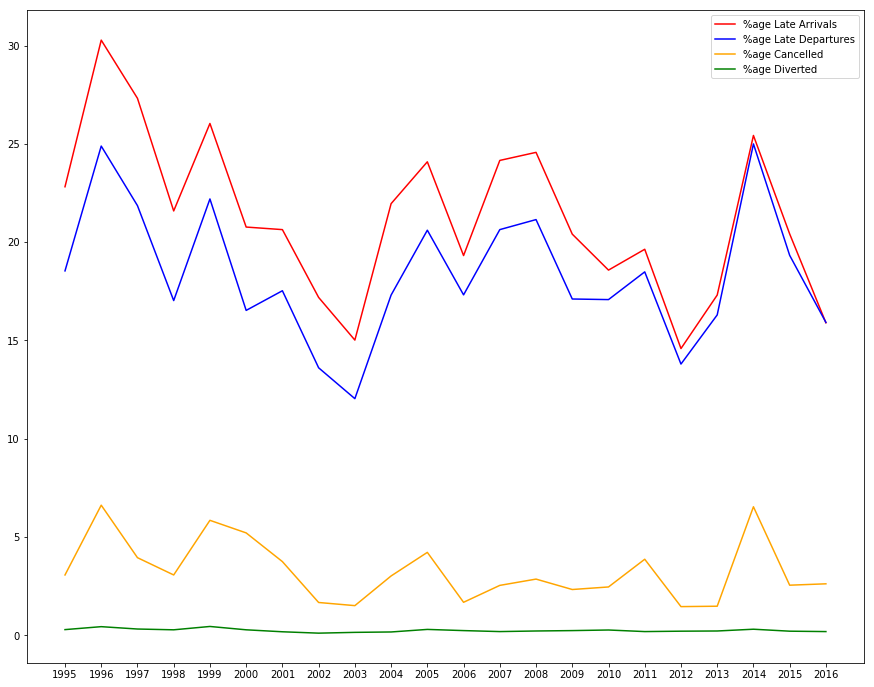

In [28]:
# USING LINE PLOT

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,12))
c = 0
for col in ["Percent Late Arrivals", "Percent Late Departures", "Percent Cancelled", "Percent Diverted"]:
    colors = ["red", "blue", "orange", "green"]
    plt.plot(on_time_perf["Year"], on_time_perf[col], color=colors[c])
    c += 1
    
plt.legend(["%age Late Arrivals", "%age Late Departures", "%age Cancelled", "%age Diverted"])
plt.show()

#### From the chart we can see that the percentage of late arrivals and late departures has been decreasing overall.

#### In recent years, the gap between late arrivals and departures has also nearly finished.

#### Cancelled and Diverted percentages sees no significant change in overall trends.

## G2. How does load-factor vary with on-time flight performances?

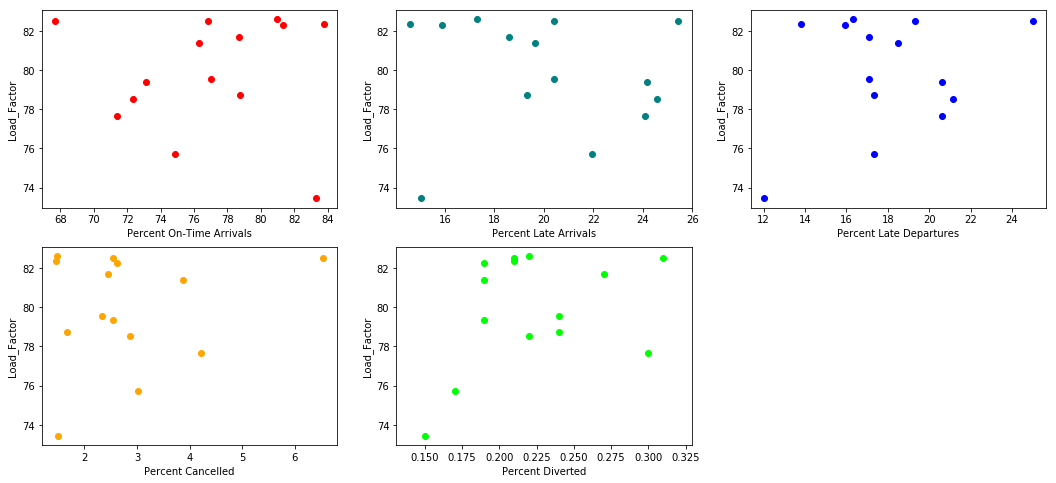

In [29]:
# USING SCATTER PLOTS

X = []

i =  flights_pass["load_factor_Total"]
for j in [0,12,24,36,48,60,72,84,96,108,120,132,144,156]:
    A = i[j] + i[j+1] + i[j+2] + i[j+3] + i[j+4] + i[j+5] + i[j+6] + i[j+7] + i[j+8] + i[j+9] + i[j+10] + i[j+11]
    X.append(A/12)

fig = plt.figure(figsize=(18,8))

c=0
for col in ["Percent On-Time Arrivals", "Percent Late Arrivals", "Percent Late Departures", "Percent Cancelled", "Percent Diverted"]:
    ax = fig.add_subplot(2,3,c+1)
    colors = ["red", "teal", "blue", "orange", "lime"]
    ax.scatter(on_time_perf[col][8:], X, color=colors[c])
    c+=1
    ax.set_xlabel(col)
    ax.set_ylabel("Load_Factor")

plt.show()

#### From the charts, the following trends are seen:

#### The load factor increases with an increase in on-time arrivals and decreases with an increase in late arrivals, which is expected.
#### In the same way, it decreases with an increase in late departures, which is again expected.
#### Understandably, the load factor falls with more cancelled flights.
#### There appears to be no appreciable relation between load factor and diverted flights

## G3. What is the share of Domestic and International flights in revenue and profits?

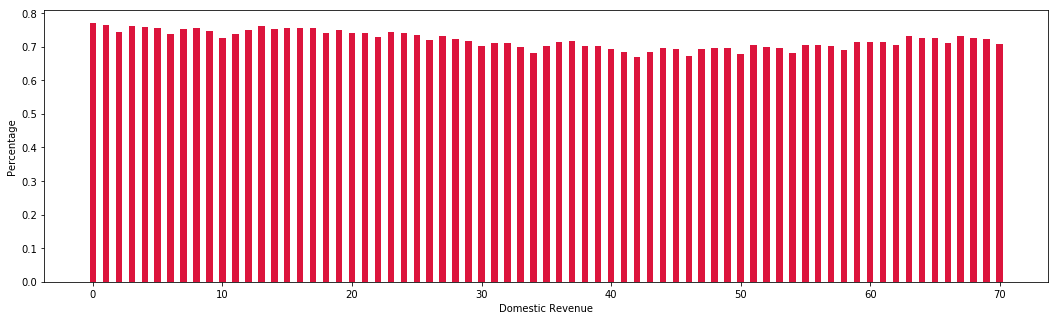

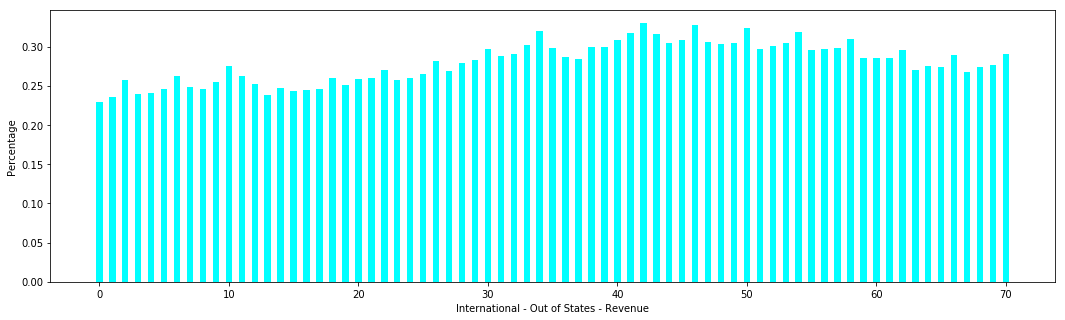

In [32]:
# USING BAR PLOTS

from numpy import arange

A = financials["Domestic_RV"][:len(financials["Domestic_RV"]) - 1]
B = financials["Total_RV"][:len(financials["Total_RV"]) - 1]
C = B - (financials["Domestic_RV"][:len(financials["Domestic_RV"]) - 1])

bar_heights_1 = A.values/B.values
bar_heights_2 = C.values/B.values
bar_positions = arange(len(A))

fig = plt.figure(figsize=(18,5))

plt.bar(bar_positions, bar_heights_1, 0.5, color="crimson")
plt.xlabel("Domestic Revenue")
plt.ylabel("Percentage")
plt.show()

fig = plt.figure(figsize=(18,5))

plt.bar(bar_positions, bar_heights_2, 0.5, color="cyan")
plt.xlabel("International - Out of States - Revenue")
plt.ylabel("Percentage")
plt.show()

#### From the above charts, we can see that the share of domestic operations in the total revenue hovers between 70-80%. In the last decade, however, the share has been near the lower 70 percents, which is shown by a proportionate increase in the share of out of international operations.

# G4. What is the distribution of sector-wise flight operations in profit and revenue percentages?

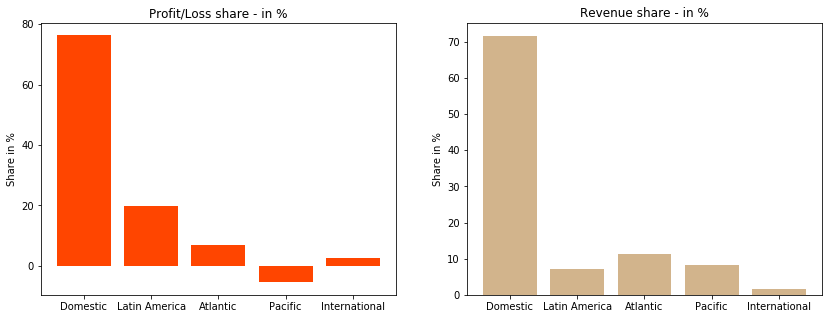

In [82]:
A = []

for i in ["Domestic_PL", "Latin America_PL", "Atlantic_PL", "Pacific_PL", "International_PL"]:
    B = financials["Total_PL"].sum()
    C = financials[i].sum()/B
    A.append(C*100)
    
D = []
    
for i in ["Domestic_RV", "Latin America_RV", "Atlantic_RV", "Pacific_RV", "International_RV"]:
    E = financials["Total_RV"].sum()
    F = financials[i].sum()/E
    D.append(F*100)

fig = plt.figure(figsize=(14,5))

c=0
for k in [A, D]:
    ax = fig.add_subplot(1,2,c+1)
    h = k
    p = arange(len(k))
    colors = ["orangered", "tan"]
    titles = ["Profit/Loss share - in %", "Revenue share - in %"]
    L = ["A", "Domestic", "Latin America", "Atlantic", "Pacific", "International"]
    ax.bar(p,h, color=colors[c])
    ax.set_title(titles[c])
    ax.set_xticklabels(L)
    ax.set_ylabel("Share in %")
    c+=1

plt.show()

#### From the above chart, we can see that although the domestic operations earn about 71% of the total revenue, they earn about 78% of the total profits.

#### It is Latin American operations however, which give the US carriers the highest returns, with only about 8% of the revenue but around 19% of the profits. It can be attributed to the relatively less competition on these routes.

#### The most loss making sector is the Pacific operations, which despite earning around 8% of the revenue, result in about 4% loss. This may be due to low rates and high competition, plus the market share is captured very much by Pacific carriers.